In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.neighbors import NearestNeighbors
from numpy.random import uniform
from random import sample
from scipy.stats import pearsonr
pd.set_option('display.max_columns', None)

# classify the data using sklearn's SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sns.set_theme()

### K-modes

In [47]:
from pyclustertend import hopkins

In [48]:
df_cat = pd.read_csv('cleaned_data_kmodes.csv')
df_cat.dropna(inplace=True)

In [49]:
df_cat.head()

,Distance(mi),cluster_location,Crossing,Junction,Traffic_Calming,Visibility(mi),Sunrise_Sunset,Weather_Condition,Month,Day_of_Week,Hour,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Wind_Speed(mph),Precipitation(in)
0,2.141,2,0,1,0,1.791759,1,Rain,12,0,9,2,41.0,37.0,86.0,29.39,6.0,0.03
1,0.014,0,0,0,0,2.302585,1,Cloudy,6,2,20,2,75.0,75.0,57.0,29.90,6.0,0.00
2,2.865,9,0,0,0,1.386294,1,Rain,12,0,10,2,40.0,34.0,100.0,30.07,8.0,0.00
3,8.573,0,0,0,0,2.302585,1,Fair,7,4,9,2,66.0,66.0,56.0,30.23,6.0,0.00
4,0.519,1,0,0,0,2.302585,1,Cloudy,8,4,12,2,71.0,71.0,73.0,30.08,5.0,0.00


In [50]:
# df_cat drop continous features
df_cat = df_cat.drop(['Distance(mi)', 'Visibility(mi)', 'Temperature(F)', "Wind_Chill(F)", 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)', 'Precipitation(in)'], axis=1)

In [51]:
df_cat.head()

,cluster_location,Crossing,Junction,Traffic_Calming,Sunrise_Sunset,Weather_Condition,Month,Day_of_Week,Hour,Severity
0,2,0,1,0,1,Rain,12,0,9,2
1,0,0,0,0,1,Cloudy,6,2,20,2
2,9,0,0,0,1,Rain,12,0,10,2
3,0,0,0,0,1,Fair,7,4,9,2
4,1,0,0,0,1,Cloudy,8,4,12,2


In [52]:
# create categories based on hour
def categorize(col):
    bins = np.linspace(0, 24, 5)
    return pd.cut(col, bins, labels=['Night','Morning','Afternoon','Evening'])

df_cat['hour_cat'] = categorize(df_cat['Hour'])
df_cat.drop(['Hour'], axis=1, inplace=True)

In [53]:
# one-hot encode these variables "cluster_location	Crossing	Junction	Traffic_Calming	Sunrise_Sunset	Weather_Condition	Day_of_Week	Severity	hour_cat" in df_cat
df_cat_encoded = pd.get_dummies(df_cat, columns=['cluster_location', 'Crossing', 'Junction', 'Traffic_Calming', 'Sunrise_Sunset', 'Weather_Condition', 'Day_of_Week', 'Severity', 'hour_cat'])

In [54]:
df_cat_encoded.head()

,Month,cluster_location_0,cluster_location_1,cluster_location_2,cluster_location_3,cluster_location_4,cluster_location_5,cluster_location_6,cluster_location_7,cluster_location_8,cluster_location_9,Crossing_0,Crossing_1,Junction_0,Junction_1,Traffic_Calming_0,Traffic_Calming_1,Sunrise_Sunset_0,Sunrise_Sunset_1,Weather_Condition_Cloudy,Weather_Condition_Fair,Weather_Condition_Fog,Weather_Condition_Rain,Weather_Condition_Snow,Weather_Condition_Thunder,Weather_Condition_Wintry Mix,Day_of_Week_0,Day_of_Week_1,Day_of_Week_2,Day_of_Week_3,Day_of_Week_4,Day_of_Week_5,Day_of_Week_6,Severity_2,Severity_4,hour_cat_Night,hour_cat_Morning,hour_cat_Afternoon,hour_cat_Evening
0,12,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,6,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,12,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,7,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,8,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [55]:
# hopkins test for df_cat_encoded
hopkins(df_cat_encoded, df_cat_encoded.shape[0])

0.12289905617270132

In [56]:
# Dropping month fo rnow – maybe get back to it later
df_cat.drop(['Month'], axis=1, inplace=True)

In [57]:
df_cat.head()

,cluster_location,Crossing,Junction,Traffic_Calming,Sunrise_Sunset,Weather_Condition,Day_of_Week,Severity,hour_cat
0,2,0,1,0,1,Rain,0,2,Morning
1,0,0,0,0,1,Cloudy,2,2,Evening
2,9,0,0,0,1,Rain,0,2,Morning
3,0,0,0,0,1,Fair,4,2,Morning
4,1,0,0,0,1,Cloudy,4,2,Morning


#### Data inspection

In [58]:
df_cat.shape

(6870, 9)

In [59]:
df_cat.describe()

,cluster_location,Crossing,Junction,Traffic_Calming,Sunrise_Sunset,Day_of_Week,Severity
count,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000
mean,3.783988,0.095197,0.178311,0.005822,0.678457,2.801310,2.027656
std,2.804740,0.293508,0.382803,0.076088,0.467103,1.881084,0.233572
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,4.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000
75%,6.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000
max,9.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000


In [60]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6870 entries, 0 to 6901
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   cluster_location   6870 non-null   int64   
 1   Crossing           6870 non-null   int64   
 2   Junction           6870 non-null   int64   
 3   Traffic_Calming    6870 non-null   int64   
 4   Sunrise_Sunset     6870 non-null   int64   
 5   Weather_Condition  6870 non-null   object  
 6   Day_of_Week        6870 non-null   int64   
 7   Severity           6870 non-null   int64   
 8   hour_cat           6776 non-null   category
dtypes: category(1), int64(7), object(1)
memory usage: 490.0+ KB


In [61]:
# convert all integers to strings
df_cat = df_cat.astype(str)

In [62]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6870 entries, 0 to 6901
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cluster_location   6870 non-null   object
 1   Crossing           6870 non-null   object
 2   Junction           6870 non-null   object
 3   Traffic_Calming    6870 non-null   object
 4   Sunrise_Sunset     6870 non-null   object
 5   Weather_Condition  6870 non-null   object
 6   Day_of_Week        6870 non-null   object
 7   Severity           6870 non-null   object
 8   hour_cat           6870 non-null   object
dtypes: object(9)
memory usage: 536.7+ KB


#### Model building

In [63]:
# First we will keep a copy of data
df_cat_copy = df_cat.copy()

In [64]:
## Data preparation
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)
df_cat.head()

,cluster_location,Crossing,Junction,Traffic_Calming,Sunrise_Sunset,Weather_Condition,Day_of_Week,Severity,hour_cat
0,2,0,1,0,1,3,0,0,2
1,0,0,0,0,1,0,2,0,1
2,9,0,0,0,1,3,0,0,2
3,0,0,0,0,1,1,4,0,2
4,1,0,0,0,1,0,4,0,2


In [65]:
# Importing Libraries
from kmodes.kmodes import KModes

In [66]:
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
fittedC= km_cao.fit_predict(df_cat)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 999, cost: 17642.0


In [67]:
# Predicted Clusters
fittedC

array([2, 0, 2, ..., 2, 0, 0], dtype=uint16)

In [68]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_cat.columns

In [69]:
# Mode of the clusters
clusterCentroidsDf

,cluster_location,Crossing,Junction,Traffic_Calming,Sunrise_Sunset,Weather_Condition,Day_of_Week,Severity,hour_cat
0,6,0,0,0,1,0,4,0,0
1,1,0,1,0,0,1,2,0,3
2,0,0,0,0,0,3,0,0,2
3,1,0,0,0,1,1,3,0,2


In [70]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_cat)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 22928.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 920, cost: 20142.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 19570.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 999, cost: 17642.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1157, cost: 17118.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1182, cost: 16688.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1832, cost: 15419.0
Run 1, iteration: 2/100, moves: 213, cost: 15419.0
Init: initializing centroids
Init

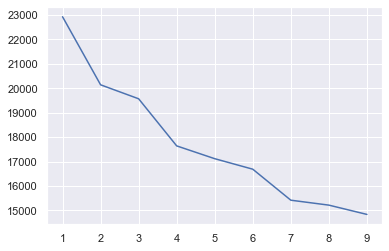

In [71]:
# Elbow curve of cost
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

#### Huang clustering algorithm

In [72]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(df_cat)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 22928.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2095, cost: 19640.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1152, cost: 19149.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2248, cost: 17286.0
Run 1, iteration: 2/100, moves: 684, cost: 17286.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 832, cost: 17356.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1721, cost: 16391.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 920, cost: 15799.0
Init: initializing centroids
I

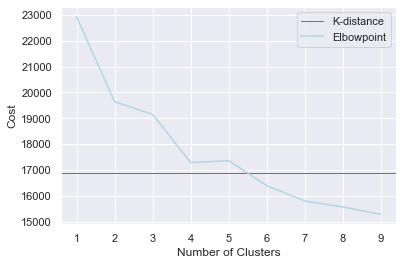

In [73]:
# Elbow curve of cost
y = np.array([i for i in range(1,10,1)])
plt.axhline(y=16900, color='r', linewidth=1.0)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.plot(y,cost, c='lightblue')
plt.legend(['K-distance', 'Elbowpoint'])



Conclusion: I choose the "Cao" optimizer as it proves the lowest cost with the least amount of clusters. I can see that 4 clusters will be the most optimal.

#### Choosing clustering algorithm and number of clusters

In [74]:
# Choosing the number of cluster
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
fittedC= km_cao.fit_predict(df_cat)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 999, cost: 17642.0


In [75]:
fittedC

array([2, 0, 2, ..., 2, 0, 0], dtype=uint16)

#### Combining the predicted with the original

In [76]:
df_cat = df_cat_copy.reset_index()

In [77]:
cDf = pd.DataFrame(fittedC)
cDf.columns = ['cluster_predicted']
combDF = pd.concat([df_cat, cDf], axis = 1).reset_index()
combDF = combDF.drop(['index', 'level_0'], axis = 1)

In [78]:
combDF.head()

,cluster_location,Crossing,Junction,Traffic_Calming,Sunrise_Sunset,Weather_Condition,Day_of_Week,Severity,hour_cat,cluster_predicted
0,2,0,1,0,1,Rain,0,2,Morning,2
1,0,0,0,0,1,Cloudy,2,2,Evening,0
2,9,0,0,0,1,Rain,0,2,Morning,2
3,0,0,0,0,1,Fair,4,2,Morning,3
4,1,0,0,0,1,Cloudy,4,2,Morning,0


#### Cluster identification

In [79]:
c_1 = combDF[combDF['cluster_predicted'] == 0]
c_2 = combDF[combDF['cluster_predicted'] == 1]
c_3 = combDF[combDF['cluster_predicted'] == 2]
c_4 = combDF[combDF['cluster_predicted'] == 3]

In [80]:
c_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 1 to 6869
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cluster_location   3749 non-null   object
 1   Crossing           3749 non-null   object
 2   Junction           3749 non-null   object
 3   Traffic_Calming    3749 non-null   object
 4   Sunrise_Sunset     3749 non-null   object
 5   Weather_Condition  3749 non-null   object
 6   Day_of_Week        3749 non-null   object
 7   Severity           3749 non-null   object
 8   hour_cat           3749 non-null   object
 9   cluster_predicted  3749 non-null   uint16
dtypes: object(9), uint16(1)
memory usage: 300.2+ KB


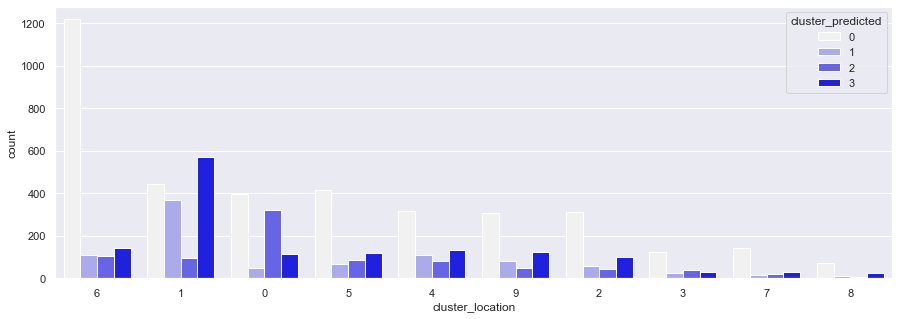

In [81]:
plt.rcParams['figure.facecolor'] = 'white'

# cluster_location
plt.subplots(figsize = (15,5))
sns.countplot(x=combDF['cluster_location'],order=combDF['cluster_location'].value_counts().index,hue=combDF['cluster_predicted'], color='blue')
plt.show()

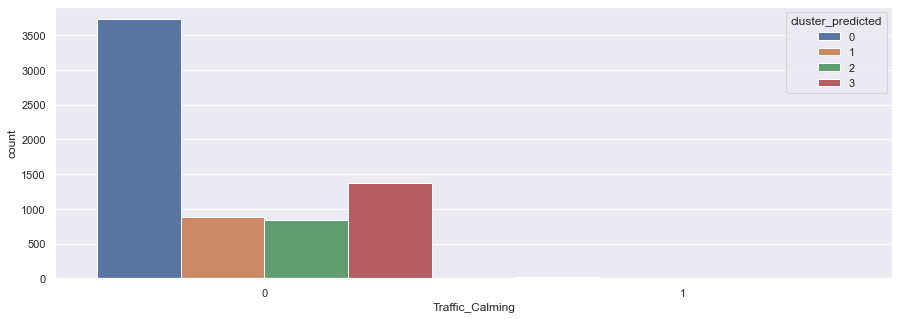

In [82]:
# traffic calming
plt.subplots(figsize = (15,5))
sns.countplot(x=combDF['Traffic_Calming'],order=combDF['Traffic_Calming'].value_counts().index,hue=combDF['cluster_predicted'])
plt.show()

In [83]:
combDF.head()

,cluster_location,Crossing,Junction,Traffic_Calming,Sunrise_Sunset,Weather_Condition,Day_of_Week,Severity,hour_cat,cluster_predicted
0,2,0,1,0,1,Rain,0,2,Morning,2
1,0,0,0,0,1,Cloudy,2,2,Evening,0
2,9,0,0,0,1,Rain,0,2,Morning,2
3,0,0,0,0,1,Fair,4,2,Morning,3
4,1,0,0,0,1,Cloudy,4,2,Morning,0


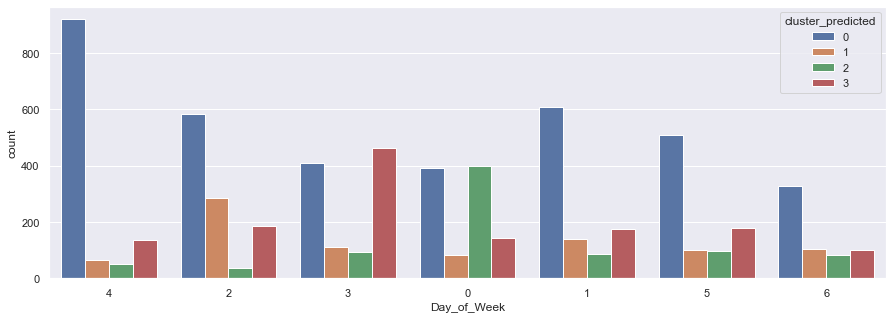

In [84]:
# Day_of_Week
plt.subplots(figsize = (15,5))
sns.countplot(x=combDF['Day_of_Week'],order=combDF['Day_of_Week'].value_counts().index,hue=combDF['cluster_predicted'])
plt.show()

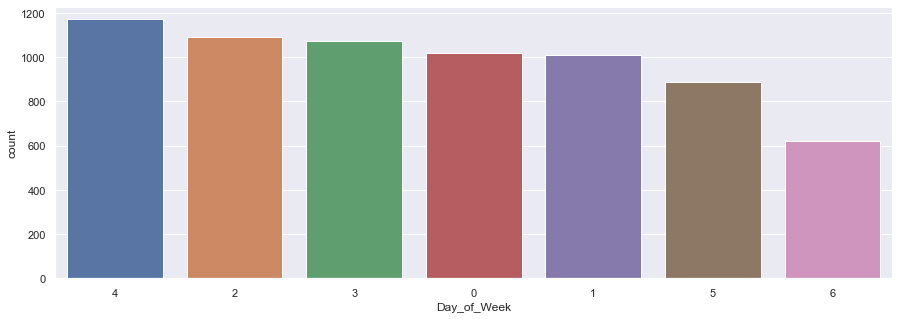

In [85]:
# Day_of_Week with no hue
plt.subplots(figsize = (15,5))
sns.countplot(x=combDF['Day_of_Week'],order=combDF['Day_of_Week'].value_counts().index)
plt.show()

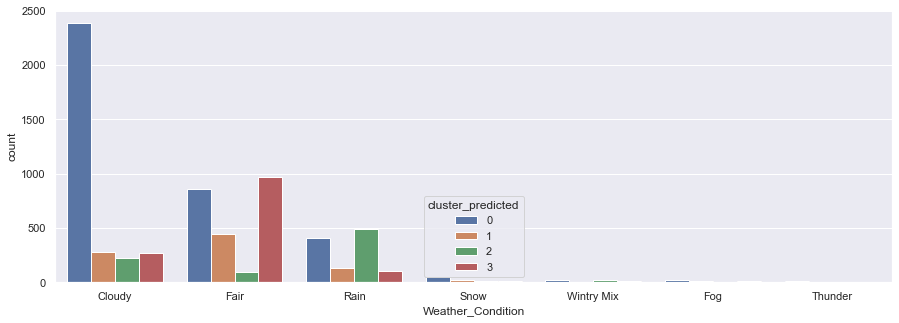

In [86]:
# Weather condition
plt.subplots(figsize = (15,5))
sns.countplot(x=combDF['Weather_Condition'],order=combDF['Weather_Condition'].value_counts().index,hue=combDF['cluster_predicted'])
plt.show()

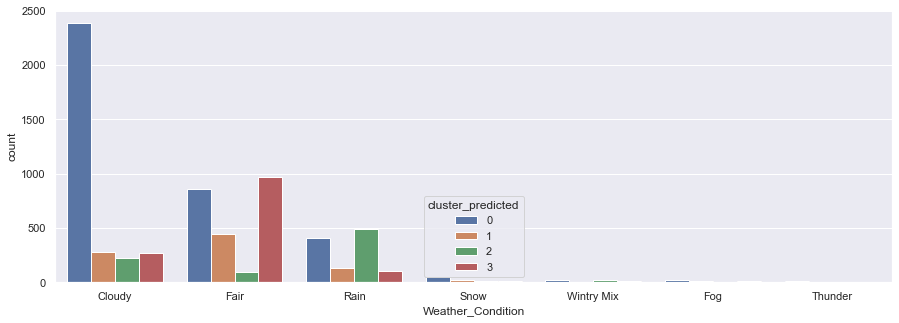

In [87]:
# Weather condition
plt.subplots(figsize = (15,5))
sns.countplot(x=combDF['Weather_Condition'],order=combDF['Weather_Condition'].value_counts().index,hue=combDF['cluster_predicted'])
plt.show()

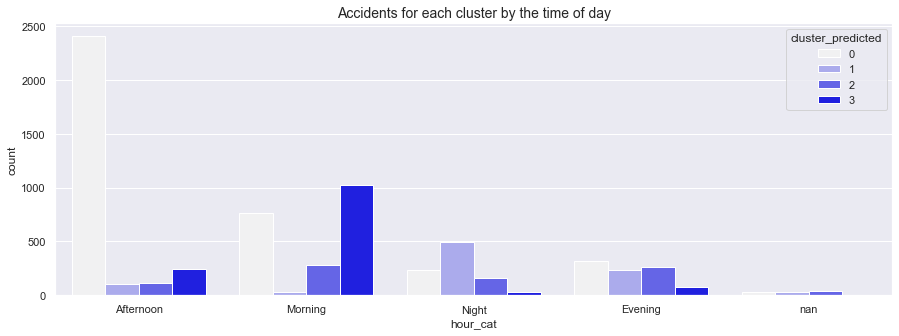

In [88]:
# Weather condition
plt.subplots(figsize = (15,5))
sns.countplot(x=combDF['hour_cat'],order=combDF['hour_cat'].value_counts().index, hue=combDF['cluster_predicted'], color = 'blue')
plt.title('Accidents for each cluster by the time of day', fontsize=14) 
plt.show()

In [89]:
# rename "Day_of_Week" into "monday", "tuesday", etc.
combDF['Day_of_Week'] = combDF['Day_of_Week'].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [0, 1, 2, 3, 4, 5, 6],)

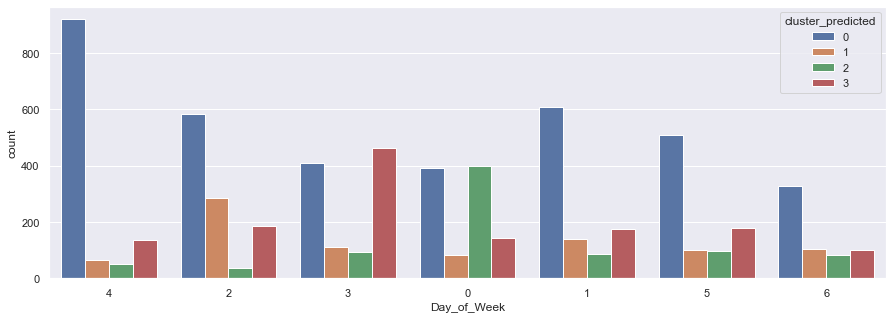

In [90]:
# Weather condition
plt.subplots(figsize = (15,5))
sns.countplot(x=combDF['Day_of_Week'],order=combDF['Day_of_Week'].value_counts().index,hue=combDF['cluster_predicted'])
plt.show()